In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class Const:
    def __init__(self):
        self.n_animals_max = 100
        self.n_animals_start = 50 # Original n_animals
        self.n_steps = 100
        self.vmin = 0.01
        self.vmax = 0.05
        
        self.hp_baby = 10
        self.hp_food = 5
        self.hp_reproduction = 30
        self.hp_birthcost =10
        self.hp_leak = 1
        
        self.food_rate = 1
        self.n_food_max = 1000
        self.n_food_start = 20
        self.eating_distance = 0.05

In [11]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(low=c.hp_baby, high=c.hp_reproduction,size=c.n_animals_start)
        
        hp = np.random.uniform(low=c.hp_baby, high=c.hp_reproduction,size=c.n_animals_max)
        
        x = np.random.uniform(size=c.n_animals_max)
        y = np.random.uniform(size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)

        # Cabbage city
        food_x = np.ones(c.n_food_max)*1
        food_x[:c.n_food_start] = np.random.uniform(size = c.n_food_start)
        food_y = np.random.uniform(size = c.n_food_max)
        
        for i_animal in range(c.n_animals_max):
            if hp[i_animal]<0: # Skip dead animals
                continue
            for i_food in range(c.n_food_max):
                d = np.sqrt((x[i_animal]-food_x[i_food])**2+(y[i_animal]-food_y[i_food])**2) 
                if d < c.eating_distance: 
                    hp[i_animal] += c.hp_food
                    food_x[i_food] = -1
                    
        # Cabbage grow fastttttttt
                    
        
        n_animals = np.zeros(c.n_steps)
        
        if show_dotses:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            hp -= c.hp_leak
                
            n_animals[t] = np.sum(hp>0)

            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0],y[hp>0], 'b.',markersize=5);
                plt.plot(food_x,food_y, 'g.',markersize=5);
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


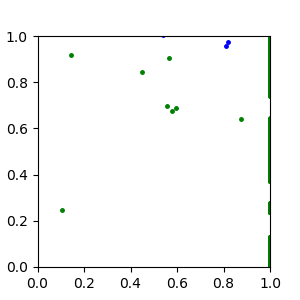

<IPython.core.display.Javascript object>


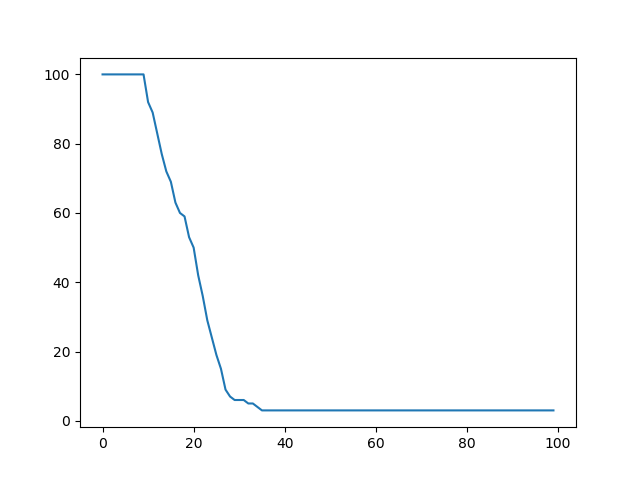

In [13]:
c = Const()
curve = model(c, show_dotses=True);
plt.figure()
plt.plot(curve);